In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


data = pd.read_csv("D:\\college\\MyCodeDiary\\C++\\CP\\ML\\Heart Disease.csv")

# Here i am Shuffling the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Handling missing values by filling with the mean
data.fillna(data.mean(), inplace=True)

# Separating input features and output labels

print(data["HeartDisease"].sum())


input_data = data.drop("HeartDisease", axis=1).values  # Features
output_data = data["HeartDisease"].values  # Labels

# Splitring the data into training (70%) and remaining 30%
x_train, x_temp, y_train, y_temp = train_test_split(input_data, output_data, test_size=0.30, random_state=42)
x_train_unscaled=x_train.copy()
y_train_unscaled=y_train.copy()

# Splitting the remaining 30% into validation (15%) and test (15%)
x_test, x_validation, y_test, y_validation = train_test_split(x_temp, y_temp, test_size=0.50, random_state=42)
x_test_unscaled=x_test.copy()
x_validation_unscaled=x_validation.copy()




# Standardizing the features using StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
x_train = scaler.fit_transform(x_train)

# Using  the same transformation (without refitting) on test and validation data
x_test = scaler.transform(x_test)
x_validation = scaler.transform(x_validation)

# Transposing  the data to match the expected shape
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
x_validation = x_validation.T






644


In [36]:
# def sigmoidFunction(z):
#     return 1/(1 + np.exp(-z))
def sigmoidFunction(z):
    # need to have this clip
    # it will avoid data overflow
    # z sometimes too big or too low
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

accuracy_record=[]

def findLoss(x_validation,y_validation):
    validation_loss=[]
    for i in range(iterations):


        z = np.dot(weight_list[i].T, x_validation) + bias_list[i]
        yi = sigmoidFunction(z)

        
        yi_clipped = np.clip(yi, 1e-7, 1 - 1e-7)

        
        cost = -(1/m) * np.sum(y_validation * np.log(yi_clipped) + (1 - y_validation) * np.log(1 - yi_clipped))
        # using the cross entropy function
        validation_loss.append(cost)
    return validation_loss


def model_accuracy(weights,bias,x,true_y):
    # true_y=np.array(true_y)
    # true_y=true_y.T
    z=np.dot(weights.T,x)+bias
    predicted_tmp_y=sigmoidFunction(z)
    predicted_y=(predicted_tmp_y>=0.5).astype(int)
    accuracy=np.mean(predicted_y==true_y)*100
    # accuracy = (1 - np.sum(np.absolute(predicted_y - true_y))/true_y.shape[1])*100
    return accuracy


m=x_train.shape[1]


n=x_train.shape[0]
cost_on_iterations=[]

weight_list=[]
bias_list=[]

def apply_model(learning_rate, iterations, inputX, outputY, cost_on_iterations_list):
    n, m = inputX.shape  
    print("Features: ",n," samples: ",m)
    weights = np.zeros((n, 1))  
    bias = 0  

    outputY = outputY.reshape(1, -1)  
    for i in range(iterations):
        
        z = np.dot(weights.T, inputX) + bias
        yi = sigmoidFunction(z)

        
        yi_clipped = np.clip(yi, 1e-7, 1 - 1e-7)
        weight_list.append(weights)
        bias_list.append(bias)

        
        cost = -(1/m) * np.sum(outputY * np.log(yi_clipped) + (1 - outputY) * np.log(1 - yi_clipped))
        cost_on_iterations_list.append(cost)
        accuracy_record.append(model_accuracy(weights,bias,inputX,outputY))

        
        # accuracy_record.append(model_accuracy(weights, bias, inputX, outputY))

        
        dW = (1/m) * np.dot(inputX, (yi - outputY).T) 
        dB = (1/m) * np.sum(yi - outputY)  

        
        weights -= learning_rate * dW
        bias -= learning_rate * dB

        

    return weights, bias,cost_on_iterations

In [37]:
iterations=1000
alpha=0.05
# alpha=0.1
y_train=np.array(y_train)
# print(x_train.shape,y_train.shape)
# print(type(x_train),type(y_train))

weights,bias,cost_on_iterations=apply_model(alpha,iterations,x_train,y_train,cost_on_iterations)


Features:  15  samples:  2966


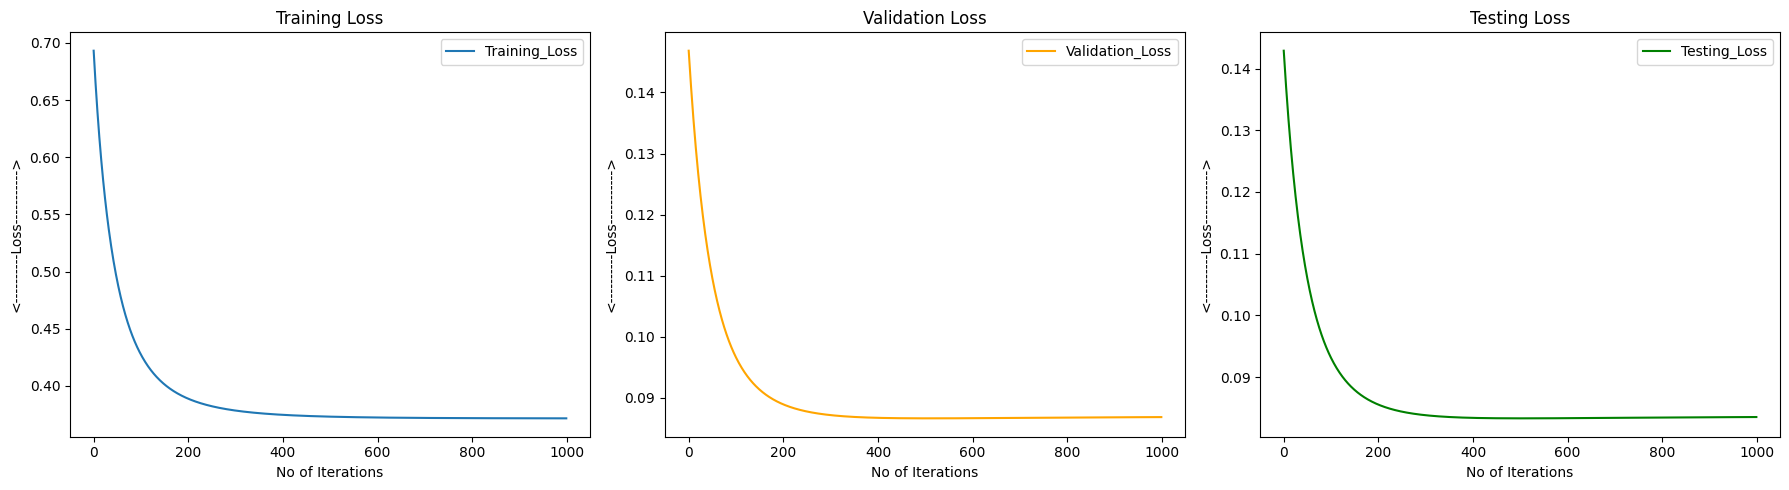

In [38]:
import matplotlib.pyplot as plt
import numpy as np


validation_loss = findLoss(x_validation, y_validation)
testing_loss = findLoss(x_test, y_test)


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Training Loss
axes[0].plot(np.arange(iterations), cost_on_iterations, label="Training_Loss")
axes[0].set_xlabel("No of Iterations")
axes[0].set_ylabel("<----------Loss----------->")
axes[0].set_title("Training Loss")
axes[0].legend()

# Plot Validation Loss
axes[1].plot(np.arange(iterations), validation_loss, label="Validation_Loss", color="orange")
axes[1].set_xlabel("No of Iterations")
axes[1].set_ylabel("<----------Loss----------->")
axes[1].set_title("Validation Loss")
axes[1].legend()

# Plot Testing Loss
axes[2].plot(np.arange(iterations), testing_loss, label="Testing_Loss", color="green")
axes[2].set_xlabel("No of Iterations")
axes[2].set_ylabel("<----------Loss----------->")
axes[2].set_title("Testing Loss")
axes[2].legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

# # Validation Loss:

#     # print(weight_list[i].T.shape,x_validation.shape)


# # plt.legend()
# validation_loss=findLoss(x_validation,y_validation)
# testing_loss=findLoss(x_test,y_test)
# plt.show()
# # plotting the graph
# plt.plot(np.arange(iterations), cost_on_iterations,label="Training_Loss")
# plt.xlabel("No of Iterations")
# plt.plot(np.arange(iterations), validation_loss,label="validation_loss")
# plt.ylabel("<----------Loss----------->")
# plt.legend()
# plt.show()
# plt.plot(np.arange(iterations), testing_loss,label="Testing_loss",color="green")
# # plt.xlabel("Iterations")
# # plt.ylabel("validation_cost")
# plt.ylabel("<----------Loss----------->")
# plt.xlabel("No of Iterations")
# plt.legend()
# plt.show()
# if i % (iterations // 10) == 0:
#             print(f"Cost after {i} iterations: {cost}")

In [39]:
def printData(l,str):
    print(str)
    for i in range(0,1000,100):
        print(l[i])

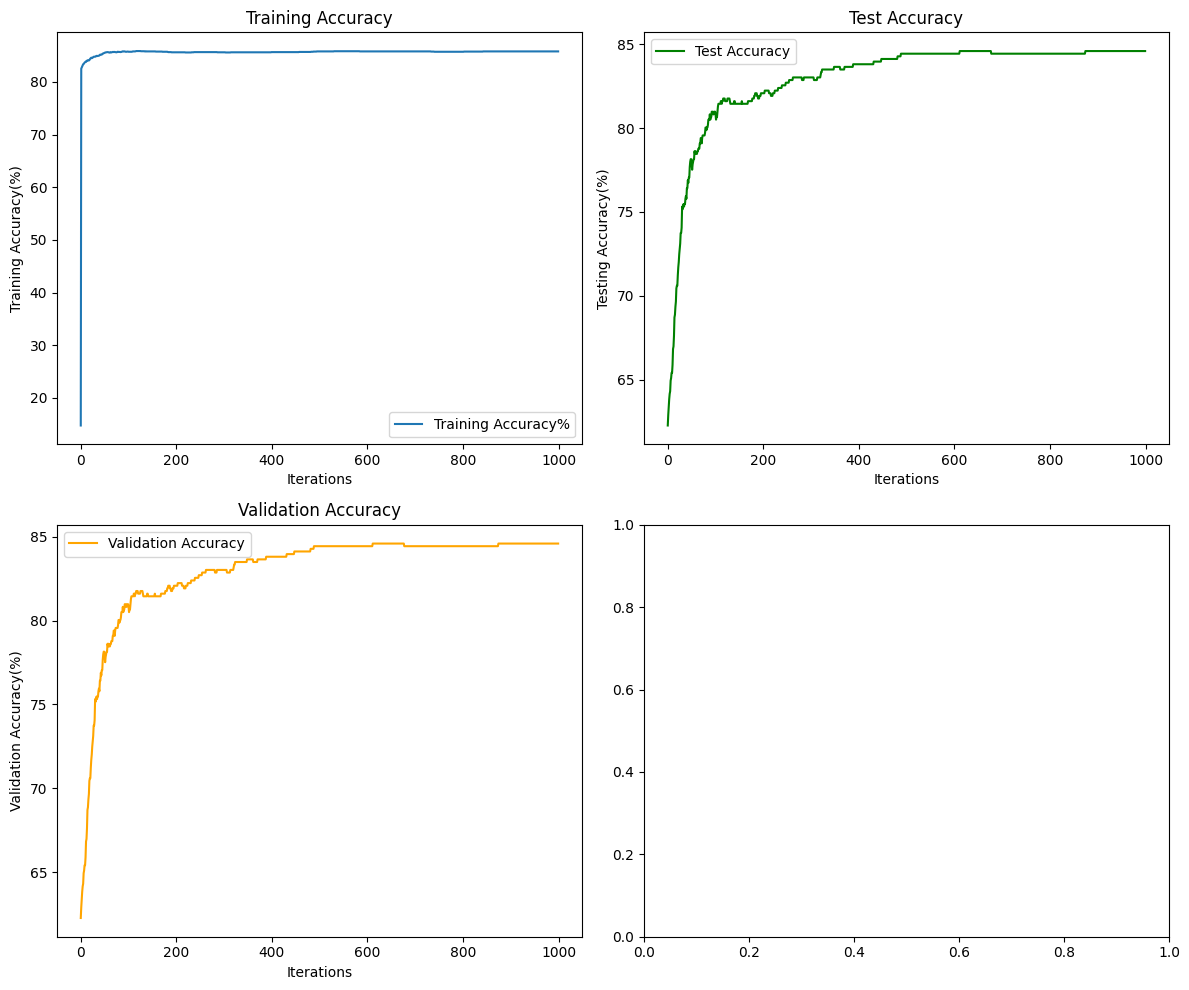

In [40]:

# print(weight_list)


# plt.ylabel("TrainingAccuracy(%)")
# plt.xlabel("Iterations")
# plt.title("Training Accuracy")



test_accuracy=[]
validation_acc=[]

y_test=np.array(y_test)
for i in range(iterations):
    test_accuracy.append(model_accuracy(weight_list[i],bias_list[i],x_test,y_test))
    validation_acc.append(model_accuracy(weight_list[i],bias_list[i],x_test,y_test))
    # print(i,test_accuracy[i])






fig, axes = plt.subplots(2, 2,figsize=(12, 10))  # 2 rows, 2 columns





axes[0, 0].plot(np.arange(iterations), accuracy_record, label="Training Accuracy%")
axes[0, 0].set_ylabel("Training Accuracy(%)")
axes[0, 0].set_xlabel("Iterations")

axes[0, 0].set_title("Training Accuracy")
axes[0, 0].legend()


axes[0, 1].plot(np.arange(iterations), test_accuracy, label="Test Accuracy", color="green")
axes[0, 1].set_xlabel("Iterations")
axes[0, 1].set_ylabel("Testing Accuracy(%)")

axes[0, 1].set_title("Test Accuracy")
axes[0, 1].legend()


axes[1, 0].plot(np.arange(iterations), validation_acc, label="Validation Accuracy", color="orange")
axes[1, 0].set_xlabel("Iterations")
axes[1, 0].set_ylabel("Validation Accuracy(%)")

axes[1, 0].set_title("Validation Accuracy")
axes[1, 0].legend()

# Adjusting  layout to avoid overlap
plt.tight_layout()
# plt.autoscale(True)

# Show the plots
plt.show()





(2966, 15)
Features:  15  samples:  2966
Features:  15  samples:  2966


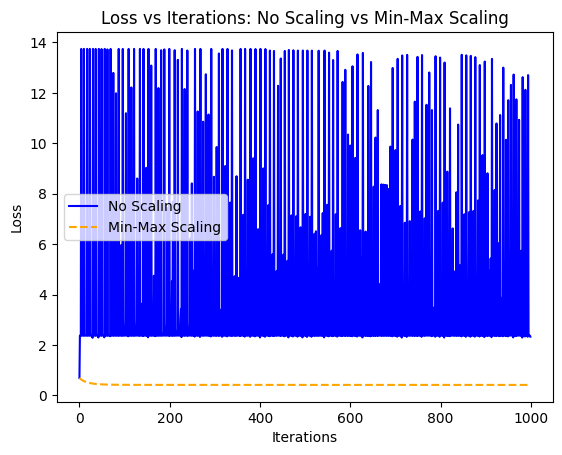

In [41]:
# part B


# loss vs iteration for no scaling:
# plotting the graph
# plt.plot(np.arange(iterations), cost_on_iterations)
# plt.show()

# now scaling the features
def min_max_scaling(X):
    X_scaled = (X - X.min(axis=1).reshape(-1, 1)) / (X.max(axis=1).reshape(-1, 1) - X.min(axis=1).reshape(-1, 1))
    return X_scaled


x_train_scaled=min_max_scaling(x_train_unscaled)
cost_scaled_list=[]
cost_on_unscaled=[]
print(x_train_unscaled.shape)
apply_model(alpha,iterations,x_train_unscaled.T,y_train,cost_on_unscaled)

apply_model(alpha,iterations,x_train_scaled.T,y_train,cost_scaled_list)

plt.plot(np.arange(iterations),cost_on_unscaled,label="No Scaling",color="blue")
plt.plot(np.arange(iterations),cost_scaled_list, label="Min-Max Scaling", linestyle="--",color="orange")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations: No Scaling vs Min-Max Scaling")

plt.legend()
plt.show()

In [42]:
# section B part c:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(weights, bias, valX, valY):

    
    z_val = np.dot(weights.T, valX) + bias
    predictions = sigmoidFunction(z_val)

    
    predicted_classes = (predictions > 0.5).astype(int).flatten()  # Ensuring that predictions are 1D

    # Ensuring here that valY is 1D as well
    
    valY = valY.flatten()
    

    
    cm = confusion_matrix(valY, predicted_classes)

    
    precision = precision_score(valY, predicted_classes)
    recall = recall_score(valY, predicted_classes)
    f1 = f1_score(valY, predicted_classes)
    roc_auc = roc_auc_score(valY, predictions.flatten())  # ROC-AUC uses continuous predictions

    print("Confusion Matrix:\n", cm)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC-AUC Score:", roc_auc)


x_test = np.array(x_test)
y_test = np.array(y_test).ravel()  # Ensure y_test is 1D
evaluate_model(weights, bias, x_test, y_test)




Confusion Matrix:
 [[531   2]
 [ 96   7]]
Precision: 0.7777777777777778
Recall: 0.06796116504854369
F1 Score: 0.125
ROC-AUC Score: 0.7532013333576203


In [43]:
def computeLoss(X,Y,weights,bias):
    z_total = np.dot(X.T, weights) + bias
    yi_total = sigmoidFunction(z_total)
    

    
    yi_total_clipped = np.clip(yi_total, 1e-10, 1 - 1e-10)

    
    
    
    cost = -(1/m) * np.sum(Y * np.log(yi_total_clipped) + (1 - Y) * np.log(1 - yi_total_clipped))
    return cost

Number of features (n): 15, Number of samples (m): 2966
Length of stochastic_cost: 1000
Iterations: 1000


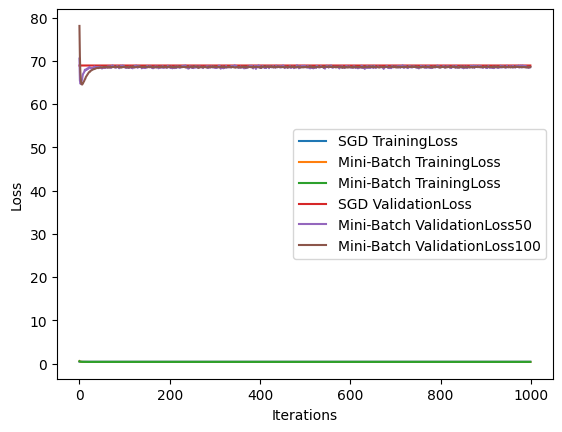

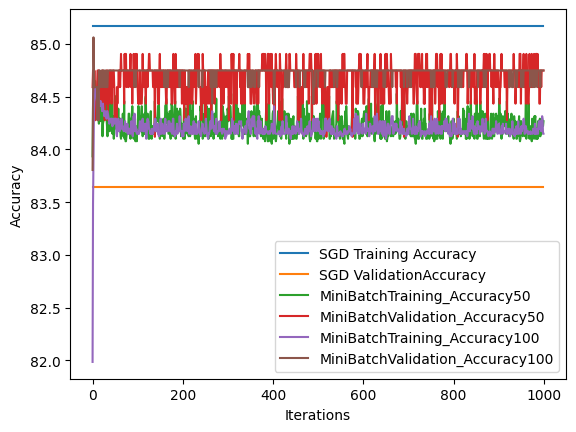

SGD loss on trainingData
0.4172129981380852
0.41715911336844996
0.41715911336844985
0.41715911336844985
0.41715911336844985
0.41715911336844985
0.41715911336844985
0.41715911336844985
0.41715911336844985
0.41715911336844985
SGD loss on ValidatingData
68.91868628578843
68.92649596415866
68.92649596415866
68.92649596415866
68.92649596415866
68.92649596415866
68.92649596415866
68.92649596415866
68.92649596415866
68.92649596415866
minibatch gradient descent loss on Training Data for batch size 50
0.47242187194682617
0.37160203082110266
0.37163086243710897
0.37164076287821135
0.37163545821143285
0.3716185439301681
0.37160718631110257
0.3716128082180802
0.3716240651361016
0.3716158173430948
minibatch gradient descent loss on Training Data for batch size 100
0.5428414443995645
0.37160017693797875
0.371598206472431
0.37159803670691843
0.3715974578081692
0.3715980231881797
0.371597294087873
0.37159804518395895
0.37159940224278787
0.37159747275517174
minibatch gradient descent loss on Training D

In [44]:
# 2 d)



stochastic_cost=[]
st_validatn_loss=[]
st_validatn_acc=[]

def stochastic_gradient_descent(X, Y, learning_rate, iterations,st_acc):
    n, m = X.shape  # n: number of features, m: number of samples
    print(f"Number of features (n): {n}, Number of samples (m): {m}")

   
    weights = np.zeros((n, 1))  
    bias = 0
    cost_list = []  

    
    Y = Y.reshape(m, 1)

    
    for i in range(iterations):
        total_cost = 0
        for j in range(m):  
            xi = X[:, j].reshape(-1, 1)  
            yi = Y[j].reshape(1, 1)  

            
            z = np.dot(weights.T, xi) + bias
            pred = sigmoidFunction(z)  

            
            pred = np.clip(pred, 1e-10, 1 - 1e-10)

            
            cost = -yi * np.log(pred) - (1 - yi) * np.log(1 - pred)
            total_cost += cost

            
            dw = xi * (pred - yi)  
            db = pred - yi  

            
            weights -= learning_rate * dw
            bias -= learning_rate * db
        
        
        z_total = np.dot(X.T, weights) + bias
        yi_total = sigmoidFunction(z_total)
      

        
        yi_total_clipped = np.clip(yi_total, 1e-10, 1 - 1e-10)

        
        
        
        cost = -(1/m) * np.sum(Y * np.log(yi_total_clipped) + (1 - Y) * np.log(1 - yi_total_clipped))
        cost_list.append(cost)
        st_validatn_loss.append(computeLoss(x_validation,y_validation,weights,bias))
        st_validatn_acc.append(model_accuracy(weights,bias,x_validation,y_validation))
        st_acc.append(model_accuracy(weights,bias,X,Y))

    

    return weights, bias, cost_list






mini_batch_accur50=[]
mini_batch_validatn_loss50=[]
mini_batch_validatn_acc50=[]



mini_batch_accur100=[]
mini_batch_validatn_loss100=[]
mini_batch_validatn_acc100=[]


def sigmoidFunction(z):
    z = np.clip(z, -500, 500)  
    return 1 / (1 + np.exp(-z))

def mini_batch_gradient_descent(X, Y, learning_rate, iterations, batch_size,accuracy_mini_training,mini_batch_validatn_loss,mini_batch_accur_valid):
    m, n = X.shape  # m: number of samples, n: number of features
    
    weights = np.zeros((n, 1)) 
    bias = 0  
    cost_list = []  

    Y = Y.reshape(-1, 1)  # Ensure Y is of shape (m, 1)

    for i in range(iterations):
        
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        Y_shuffled = Y[permutation]

        
        for k in range(0, m, batch_size):
            X_batch = X_shuffled[k:k+batch_size, :]
            Y_batch = Y_shuffled[k:k+batch_size]

            
            z = np.dot(X_batch, weights) + bias
            pred = sigmoidFunction(z)

            
            pred = np.clip(pred, 1e-10, 1 - 1e-10)  

            
            dw = np.dot(X_batch.T, (pred - Y_batch)) / batch_size  
            db = np.mean(pred - Y_batch)  

            
            weights -= learning_rate * dw
            bias -= learning_rate * db

        
        z_total = np.dot(X, weights) + bias
        yi_total = sigmoidFunction(z_total)
      

        
        yi_total_clipped = np.clip(yi_total, 1e-10, 1 - 1e-10)

        # Compute the cost (cross-entropy loss)
        
        
        cost = -(1/m) * np.sum(Y * np.log(yi_total_clipped) + (1 - Y) * np.log(1 - yi_total_clipped))
        cost_list.append(cost)
        mini_batch_validatn_loss.append(computeLoss(x_validation,y_validation,weights,bias))
        mini_batch_accur_valid.append(model_accuracy(weights,bias,x_validation,y_validation))
        accuracy_mini_training.append(model_accuracy(weights,bias,X.T,Y))

     

    return weights, bias, cost_list











st_acc=[]


st_weight, st_bias, stochastic_cost = stochastic_gradient_descent(x_train, y_train, alpha, iterations,st_acc)



weights_mini, bias_mini, mini_batch_cost50 = mini_batch_gradient_descent(x_train.T, y_train, alpha, iterations, 50,mini_batch_accur50,mini_batch_validatn_loss50,mini_batch_validatn_acc50)
weights_mini, bias_mini, mini_batch_cost100 = mini_batch_gradient_descent(x_train.T, y_train, alpha, iterations, 100,mini_batch_accur100,mini_batch_validatn_loss100,mini_batch_validatn_acc100)

# Ensure costs have the correct shape for plotting
stochastic_cost = np.array(stochastic_cost).flatten()  # Flatten in case it's multidimensional
mini_batch_cost = np.array(mini_batch_cost50).flatten()
mini_batch_cost = np.array(mini_batch_cost100).flatten()

# Ensure lengths match
print(f"Length of stochastic_cost: {len(stochastic_cost)}")
# print(f"Length of mini_batch_cost: {len(mini_batch_cost)}")
print(f"Iterations: {iterations}")

# Plot the costs over iterations
plt.plot(np.arange(len(stochastic_cost)), stochastic_cost, label="SGD TrainingLoss")
plt.plot(np.arange(len(mini_batch_cost50)), mini_batch_cost, label="Mini-Batch TrainingLoss")
plt.plot(np.arange(len(mini_batch_cost100)), mini_batch_cost, label="Mini-Batch TrainingLoss")
plt.plot(np.arange(len(st_validatn_acc)), st_validatn_loss, label="SGD ValidationLoss")

plt.plot(np.arange(len(mini_batch_validatn_loss50)), mini_batch_validatn_loss50, label="Mini-Batch ValidationLoss50")
plt.plot(np.arange(len(mini_batch_validatn_loss100)), mini_batch_validatn_loss100, label="Mini-Batch ValidationLoss100")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.plot(np.arange(len(st_acc)), st_acc, label="SGD Training Accuracy")
plt.plot(np.arange(iterations), st_validatn_acc, label="SGD ValidationAccuracy")
plt.plot(np.arange(len(mini_batch_accur50)), mini_batch_accur50, label="MiniBatchTraining_Accuracy50")
plt.plot(np.arange(len(mini_batch_validatn_acc50)), mini_batch_validatn_acc50, label="MiniBatchValidation_Accuracy50")
plt.plot(np.arange(len(mini_batch_accur100)), mini_batch_accur100, label="MiniBatchTraining_Accuracy100")
plt.plot(np.arange(len(mini_batch_validatn_acc100)), mini_batch_validatn_acc100, label="MiniBatchValidation_Accuracy100")


plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

printData(stochastic_cost,"SGD loss on trainingData")
printData(st_validatn_loss,"SGD loss on ValidatingData")
printData(mini_batch_cost50,"minibatch gradient descent loss on Training Data for batch size 50")
printData(mini_batch_cost100,"minibatch gradient descent loss on Training Data for batch size 100")
printData(mini_batch_validatn_acc50,"minibatch gradient descent loss on Training Data for batch size 50")
printData(mini_batch_validatn_acc100,"minibatch gradient descent loss on Training Data for batch size 100")

printData(st_validatn_acc,"SGD Accuracy on training DAta")
printData(mini_batch_validatn_acc50,"minibatch gradient descent (batch size 50)Accuracy on validation data")
printData(mini_batch_validatn_acc100,"minibatch gradient descent (batch size 100)Accuracy on validation data")









In [50]:
# Section B part e
import numpy as np


def k_fold_cross_validation(X, Y, k=5, learning_rate=0.01, iterations=1000):

    m = X.shape[1]  # Number of samples


    fold_size = m // k  # Size of each fold

    
    indices = np.random.permutation(m)
    X_shuffled = X[:, indices]
    Y_shuffled = Y[indices]

    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    for fold in range(k):
        # Here i am Creating the test set (the fold-th part)
        start = fold * fold_size

        end = start + fold_size
        X_test = X_shuffled[:, start:end]
        Y_test = Y_shuffled[start:end]

        # Create the training set (all other parts except fold-th)
        X_train = np.hstack((X_shuffled[:, :start], X_shuffled[:, end:]))
        Y_train = np.hstack((Y_shuffled[:start], Y_shuffled[end:]))

        
        weights, bias = stochastic_gradient_descent(X_train, Y_train, learning_rate, iterations)

        
        z_test = np.dot(weights.T, X_test) + bias
        predictions = sigmoidFunction(z_test)
        predicted_classes = (predictions >= 0.5).astype(int).flatten()

        
        accuracy = np.mean(predicted_classes == Y_test)

        # Handle cases where there are no positive predictions
        if np.sum(predicted_classes) == 0:
            precision, recall, f1 = 0, 0, 0
        else:
            precision = np.sum((predicted_classes == 1) & (Y_test == 1)) / np.sum(predicted_classes == 1)
            if(np.sum(Y_test==1)!=0):
              recall = np.sum((predicted_classes == 1) & (Y_test == 1)) / np.sum(Y_test == 1)
            else:
              recall=0
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        print(f"fold no: {fold} accuracy: {accuracy}, precision: {precision}, recall:{recall},f1 score:{f1}")

    
    accuracy_avg = np.mean(accuracy_list)
    precision_avg = np.mean(precision_list)
    recall_avg = np.mean(recall_list)
    f1_avg = np.mean(f1_list)

    accuracy_std = np.std(accuracy_list)
    precision_std = np.std(precision_list)
    recall_std = np.std(recall_list)
    f1_std = np.std(f1_list)

    
    print(f"MeanAccuracy: {accuracy_avg:.4f} Standard Deviation: {accuracy_std:.4f}")
    print(f"MeanPrecision: {precision_avg:.4f} Standard Deviation: {precision_std:.4f}")
    print(f"MeanRecall: {recall_avg:.4f} Standard Deviation: {recall_std:.4f}")
    print(f"MeanF1 Score: {f1_avg:.4f} Standard Deviation: {f1_std:.4f}")






k_fold_cross_validation(input_data, output_data, k=5, learning_rate=0.05, iterations=500)


fold no: 0 accuracy: 0.6666666666666666, precision: 0.0, recall:0,f1 score:0
fold no: 1 accuracy: 0.3333333333333333, precision: 0.0, recall:0.0,f1 score:0
fold no: 2 accuracy: 0.6666666666666666, precision: 0.0, recall:0,f1 score:0
fold no: 3 accuracy: 0.6666666666666666, precision: 0.0, recall:0,f1 score:0
fold no: 4 accuracy: 0.3333333333333333, precision: 0, recall:0,f1 score:0
MeanAccuracy: 0.5333 Standard Deviation: 0.1633
MeanPrecision: 0.0000 Standard Deviation: 0.0000
MeanRecall: 0.0000 Standard Deviation: 0.0000
MeanF1 Score: 0.0000 Standard Deviation: 0.0000


Early stopping at iteration 32


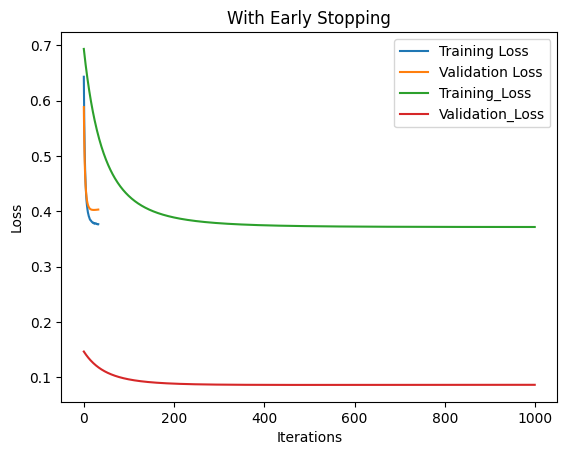

In [46]:



def sigmoidFunction(z):
    
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

# L2 Regularized Gradient Descent with Early Stopping
def gradient_descent_with_early_stopping(X_train, Y_train, X_val, Y_val, learning_rate=0.01, iterations=1000, batch_size=32, lambda_reg=0.1, patience=10):
    n, m = X_train.shape  
    # Here n are no of features and m is no of sampels
    weights = np.zeros((n, 1))  
    bias = 0  
    val_loss_history = []
    train_loss_history = []

    best_weights = None
    best_bias = None
    best_loss = float('inf')
    patience_counter = 0

    for i in range(iterations):
        total_cost = 0

        # Shuffle the training data
        permutation = np.random.permutation(m)
        X_train_shuffled = X_train[:, permutation]
        Y_train_shuffled = Y_train[permutation]

        for j in range(0, m, batch_size):
            X_batch = X_train_shuffled[:, j:j + batch_size]
            Y_batch = Y_train_shuffled[j:j + batch_size]

            
            z = np.dot(weights.T, X_batch) + bias
            pred = sigmoidFunction(z)

            # Here i am fiding  the cost with L2 regularization
          
            pred = np.clip(pred, 1e-7, 1 - 1e-7)
            cost = -np.mean(Y_batch * np.log(pred) + (1 - Y_batch) * np.log(1 - pred)) + (lambda_reg / (2 * m)) * np.sum(np.square(weights))
            total_cost += cost

            # Computing gradients with L2 regularization
            dw = np.dot(X_batch, (pred - Y_batch).T) / batch_size + (lambda_reg / m) * weights
            db = np.mean(pred - Y_batch)

            
            weights -= learning_rate * dw
            bias -= learning_rate * db

        
        train_loss_history.append(total_cost / (m // batch_size))

        # Validation loss
        z_val = np.dot(weights.T, X_val) + bias
        pred_val = sigmoidFunction(z_val)
        pred_val = np.clip(pred_val, 1e-7, 1 - 1e-7)  # Clipping to prevent log issues
        val_loss = -np.mean(Y_val * np.log(pred_val) + (1 - Y_val) * np.log(1 - pred_val)) + (lambda_reg / (2 * m)) * np.sum(np.square(weights))
        val_loss_history.append(val_loss)

        # Early stopping check
        if val_loss < best_loss:
            best_loss = val_loss
            best_weights = weights
            best_bias = bias
            patience_counter = 0  # Reset patience counter
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at iteration {i}")
            break

        

    return best_weights, best_bias, train_loss_history, val_loss_history


def plot_loss(train_loss, val_loss, title):
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.plot(np.arange(iterations), cost_on_iterations, label="Training_Loss")
    plt.plot(np.arange(iterations), validation_loss, label="Validation_Loss")
    
    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()




weights, bias, train_loss_es, val_loss_es = gradient_descent_with_early_stopping(x_train, y_train, x_validation, y_validation, learning_rate=0.01, iterations=1000, batch_size=32, lambda_reg=0.1, patience=10)

plot_loss(train_loss_es, val_loss_es, "With Early Stopping")
